In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#strDataset = '/content/drive/MyDrive/Text Mining & Image Recognition/Laboratorio3/tw_source.csv'

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


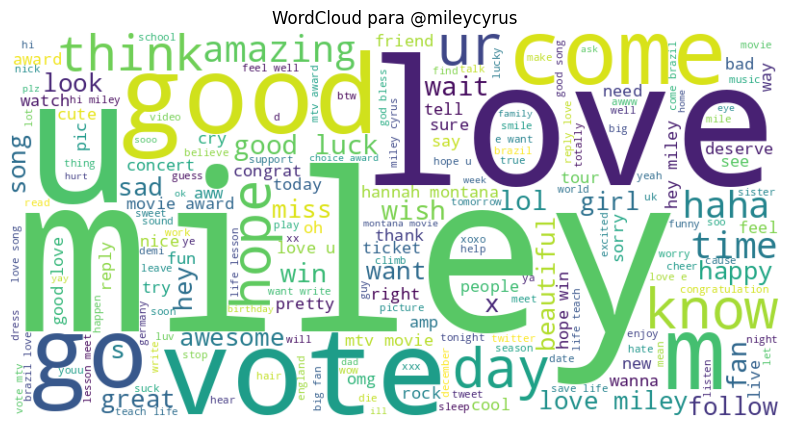

Palabras más comunes alrededor del usuario @mileycyrus: [('love', 914), ('miley', 857), ('u', 637), ('good', 522), ('vote', 430), ('not', 365), ('come', 328), ('hope', 289), ('m', 273), ('like', 252)]


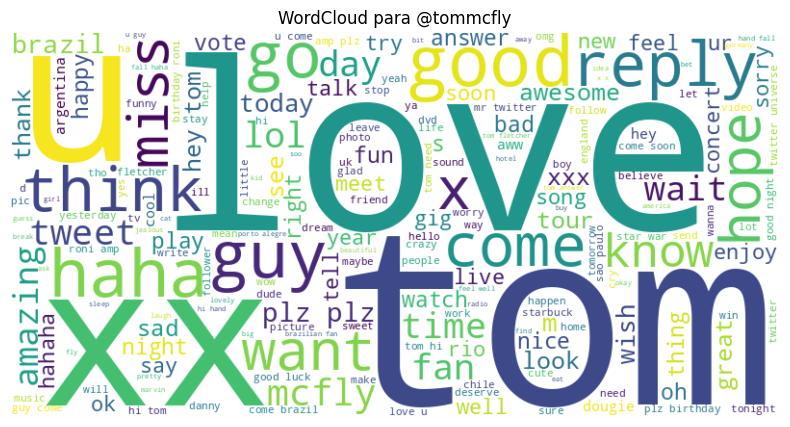

Palabras más comunes alrededor del usuario @tommcfly: [('tom', 715), ('love', 465), ('come', 373), ('good', 368), ('u', 348), ('xx', 306), ('guy', 290), ('not', 277), ('haha', 264), ('x', 262)]


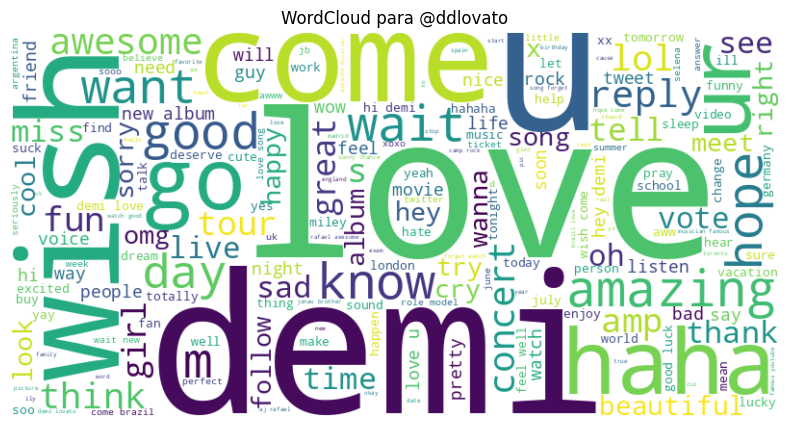

Palabras más comunes alrededor del usuario @ddlovato: [('love', 633), ('demi', 590), ('u', 441), ('come', 368), ('not', 300), ('good', 277), ('wish', 257), ('hope', 247), ('wait', 234), ('like', 231)]


In [4]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import spacy

# Cargar el modelo de SpaCy para inglés
nlp = spacy.load('en_core_web_sm')

# Definir los nombres de las columnas basados en el ejemplo proporcionado
column_names = ['polarity', 'id', 'date', 'query', 'user', 'text']

# Cargar el dataset especificando que no hay encabezados y asignando los nombres de columnas
df = pd.read_csv('/content/drive/MyDrive/Text Mining & Image Recognition/Laboratorio3/tw_source.csv',
                 header=None,                # Indica que el archivo no tiene encabezados
                 names=column_names,         # Asigna los nombres de columnas definidos
                 encoding='ISO-8859-1',      # Usa la codificación adecuada para evitar errores
                 on_bad_lines='skip')        # Salta líneas con errores de formato

# Extraer los usuarios más populares
df['user'] = df['text'].apply(lambda x: re.findall(r'@\w+', x))
all_users = [user for sublist in df['user'].tolist() for user in sublist]
top_users = Counter(all_users).most_common(3)

# Crear el corpus para cada usuario
corpus = {}
for user, _ in top_users:
    user_tweets = df[df['text'].str.contains(user)]
    corpus[user] = {
        'content': user_tweets['text'].tolist(),
        'metadata': {
            'ID': user_tweets['id'].tolist(),
            'Timestamp': user_tweets['date'].tolist(),
            'Length': user_tweets['text'].apply(len).tolist()
        }
    }

# Procesamiento del texto usando SpaCy (Stopwords, Lemmatization)
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Procesar y analizar el contenido de cada usuario
for user in corpus:
    processed_texts = [' '.join(preprocess_text_spacy(tweet)) for tweet in corpus[user]['content']]
    corpus[user]['processed'] = processed_texts

    # Crear WordCloud para el usuario
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(processed_texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud para {user}")
    plt.show()

    # Analizar las palabras más comunes en el contexto del usuario
    context_words = Counter(' '.join(processed_texts).split()).most_common(10)
    print(f"Palabras más comunes alrededor del usuario {user}: {context_words}")